![Exploratory data analysis and preprocessing](https://raw.githubusercontent.com/DmitryRyumin/python_libs/master/samples/EDA/images/exploratory_data_analysis_and_preprocessing.svg?sanitize=true)

### Импорт необходимых инструментов

In [374]:
import platform # Доступ к данных платформы
import pandas as pd # Обработка и анализ данных
import numpy as np # Научные вычисления
import matplotlib as mpl # Визуализация графиков
import matplotlib.pyplot as plt # Визуализация 2D и 3D графики
import seaborn as sns # Визуализация (надстройка над matplotlib)
import math # Математические функции
import pylab # Построение графиков
import sklearn # Машинное обучение

from sklearn import preprocessing as pr # Предварительная обработка и нормализация

# Визуализация в виде обычного изображения
%matplotlib inline

### Версии необходимых библиотек

In [375]:
# Отображение в DataFrame
versions = {
    'Lib': ['Python', 'Pandas', 'Matplotlib', 'NumPy', 'Seaborn', 'Scikit-learn'],
    'Version': [platform.python_version(), pd.__version__, mpl.__version__, np.__version__, sns.__version__, sklearn.__version__]}

df_versions = pd.DataFrame(data = versions) # Версии используемых библиотек
df_versions.head(None) # Отображение первых N строк или все если указать None

,Lib,Version
0,Python,3.7.7
1,Pandas,1.0.3
2,Matplotlib,3.2.1
3,NumPy,1.18.2
4,Seaborn,0.10.0
5,Scikit-learn,0.22.2.post1


### Настройки необходимых инструментов

In [376]:
pd.set_option('display.max_columns', None) # Максимальное количество отображаемых столбцов
pd.set_option('display.max_rows', None) # Максимальное количество отображаемых строк

### Считывание данных - [продажа машин](https://www.kaggle.com/fazilbtopal/auto85)

> Целевая переменная `price`

In [377]:
df = pd.read_csv('DB/auto_clean.csv') # Считывание данных
df.head(5) # Отображение первых N строк или все если указать None

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,0.919444,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,0.922222,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


### Информации о наборе данных

In [380]:
df.info() # Описание набора данных

# print(df.dtypes) # Описание типов столбцов набора данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    int64  
 2   make               201 non-null    object 
 3   aspiration         201 non-null    object 
 4   num-of-doors       201 non-null    object 
 5   body-style         201 non-null    object 
 6   drive-wheels       201 non-null    object 
 7   engine-location    201 non-null    object 
 8   wheel-base         201 non-null    float64
 9   length             201 non-null    float64
 10  width              201 non-null    float64
 11  height             201 non-null    float64
 12  curb-weight        201 non-null    int64  
 13  engine-type        201 non-null    object 
 14  num-of-cylinders   201 non-null    object 
 15  engine-size        201 non-null    int64  
 16  fuel-system        201 non

### Заполнение пустых значений

In [381]:
df = df.fillna(0) # Заполнение нулями

### Статистика набора данных

#### Числовые данные

| Названия | Описания                                                                          |
| -------- | --------------------------------------------------------------------------------- |
| `count`  | Количество не нулевых элементов                                                   |
| `mean`   | Среднее значение                                                                  |
| `std`    | Стандартное отклонение наблюдений (чем ближе к `0` тем разброс меньше)            |
| `min`    | Минимальное значение                                                              |
| `25%`    | 25-й прецентиль (такое значение, ниже которого попадают 25% значений)             |
| `50%`    | 50-й прецентиль - медианна (такое значение, ниже которого попадают 50% значений)  |
| `75%`    | 75-й прецентиль (такое значение, ниже которого попадают 75% значений)             |
| `max`    | Максимальное значение                                                             |

In [382]:
df.describe(include = [np.number]) # Статистика набора данных

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.192090,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.554809,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,0.000000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.100000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


#### Объекты

| Названия | Описания                                     |
| -------- | -------------------------------------------- |
| `count`  | Количество не нулевых элементов              |
| `unique` | Количество уникальных значений               |
| `top`    | Самое распостраненное значение               |
| `freq`   | Количество самого распространенного значения |

In [338]:
df.describe(include = [np.object]) # Статистика набора данных

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201,201
unique,22,2,2,5,3,2,6,7,8,4
top,toyota,std,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,165,115,94,118,198,145,157,92,115


### Преобразование категориальных или текстовых данных в числа

In [339]:
class MultiColumnLabelEncoder:
    """
    Преобразование категориальных или текстовых данных в числа
    """
    
    def __init__(self, columns = None):
        self.columns = columns 

    def fit(self, X, y = None):
        return self 

    def transform(self, X):
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = pr.LabelEncoder().fit_transform(output[col].astype(str))
        else:
            for colname,col in output.iteritems():
                output[colname] = pr.LabelEncoder().fit_transform(col.astype(str))
        return output

    def fit_transform(self, X, y = None):
        return self.fit(X, y).transform(X)

In [340]:
"""
Преобразование категориальных или текстовых данных в числа
"""
df_encoder = MultiColumnLabelEncoder(
    columns = [
        'make',
        'aspiration',
        'num-of-doors',
        'body-style',
        'drive-wheels',
        'engine-location',
        'engine-type',
        'num-of-cylinders',
        'fuel-system',
        'horsepower-binned'
    ]).fit_transform(df)

df_encoder.head() # Отображение первых N строк

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,0,0,1,0,2,0,88.6,0.811148,0.890278,48.8,2548,0,2,130,5,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,3,0,1
1,3,122,0,0,1,0,2,0,88.6,0.811148,0.890278,48.8,2548,0,2,130,5,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,3,0,1
2,1,122,0,0,1,2,2,0,94.5,0.822681,0.909722,52.4,2823,4,3,152,5,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,3,0,1
3,2,164,1,0,0,3,1,0,99.8,0.848630,0.919444,54.3,2337,2,2,109,5,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,3,0,1
4,2,164,1,0,0,3,0,0,99.4,0.848630,0.922222,54.3,2824,2,1,136,5,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,3,0,1


### Информации о преобразованном наборе данных

In [341]:
df_encoder.info() # Описание набора данных

# print(df.dtypes) # Описание типов столбцов набора данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    int64  
 2   make               201 non-null    int64  
 3   aspiration         201 non-null    int64  
 4   num-of-doors       201 non-null    int64  
 5   body-style         201 non-null    int64  
 6   drive-wheels       201 non-null    int64  
 7   engine-location    201 non-null    int64  
 8   wheel-base         201 non-null    float64
 9   length             201 non-null    float64
 10  width              201 non-null    float64
 11  height             201 non-null    float64
 12  curb-weight        201 non-null    int64  
 13  engine-type        201 non-null    int64  
 14  num-of-cylinders   201 non-null    int64  
 15  engine-size        201 non-null    int64  
 16  fuel-system        201 non

### Статистика преобразованного набора данных

#### Числовые данные

| Названия | Описания                                                                          |
| -------- | --------------------------------------------------------------------------------- |
| `count`  | Количество не нулевых элементов                                                   |
| `mean`   | Среднее значение                                                                  |
| `std`    | Стандартное отклонение наблюдений (чем ближе к `0` тем разброс меньше)            |
| `min`    | Минимальное значение                                                              |
| `25%`    | 25-й прецентиль (такое значение, ниже которого попадают 25% значений)             |
| `50%`    | 50-й прецентиль - медианна (такое значение, ниже которого попадают 50% значений)  |
| `75%`    | 75-й прецентиль (такое значение, ниже которого попадают 75% значений)             |
| `max`    | Максимальное значение                                                             |

#### Объекты

| Названия | Описания                                     |
| -------- | -------------------------------------------- |
| `unique` | Количество уникальных значений               |
| `top`    | Самое распостраненное значение               |
| `freq`   | Количество самого распространенного значения |

In [342]:
df_encoder.describe(include = 'all') # Статистика преобразованного набора данных

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.00000,201.000000,201.000000
mean,0.840796,122.00000,12.298507,0.179104,0.427861,2.616915,1.333333,0.014925,98.797015,0.837102,0.915126,53.766667,2555.666667,2.084577,2.134328,126.875622,3.258706,3.330692,3.192090,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,2.18408,0.099502,0.900498
std,1.254802,31.99625,6.253035,0.384397,0.496004,0.864588,0.550757,0.121557,6.066366,0.059213,0.029187,2.447822,517.296727,0.898783,0.785408,41.546834,2.013141,0.268072,0.554809,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.64105,0.300083,0.300083
min,-2.000000,65.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,86.600000,0.678039,0.837500,47.800000,1488.000000,0.000000,0.000000,61.000000,0.000000,2.540000,0.000000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.00000,0.000000,0.000000
25%,0.000000,101.00000,8.000000,0.000000,0.000000,2.000000,1.000000,0.000000,94.500000,0.801538,0.890278,52.000000,2169.000000,2.000000,2.000000,98.000000,1.000000,3.150000,3.100000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,2.00000,0.000000,1.000000
50%,1.000000,122.00000,12.000000,0.000000,0.000000,3.000000,1.000000,0.000000,97.000000,0.832292,0.909722,54.100000,2414.000000,2.000000,2.000000,120.000000,5.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,2.00000,0.000000,1.000000
75%,2.000000,137.00000,19.000000,0.000000,1.000000,3.000000,2.000000,0.000000,102.400000,0.881788,0.925000,55.500000,2926.000000,2.000000,2.000000,141.000000,5.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,3.00000,0.000000,1.000000
max,3.000000,256.00000,21.000000,1.000000,1.000000,4.000000,2.000000,1.000000,120.900000,1.000000,1.000000,59.800000,4066.000000,5.000000,6.000000,326.000000,7.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,3.00000,1.000000,1.000000


### Корреляция - показывает на сколько одни значения зависимы от других

![Correlation analysis](https://raw.githubusercontent.com/DmitryRyumin/python_libs/master/samples/correlation_analysis.svg?sanitize=true)

In [343]:
Corr = df_encoder.corr(method = 'pearson') # Корреляция Пирсона

### Построение тепловой карты на основе корреляционного анализа

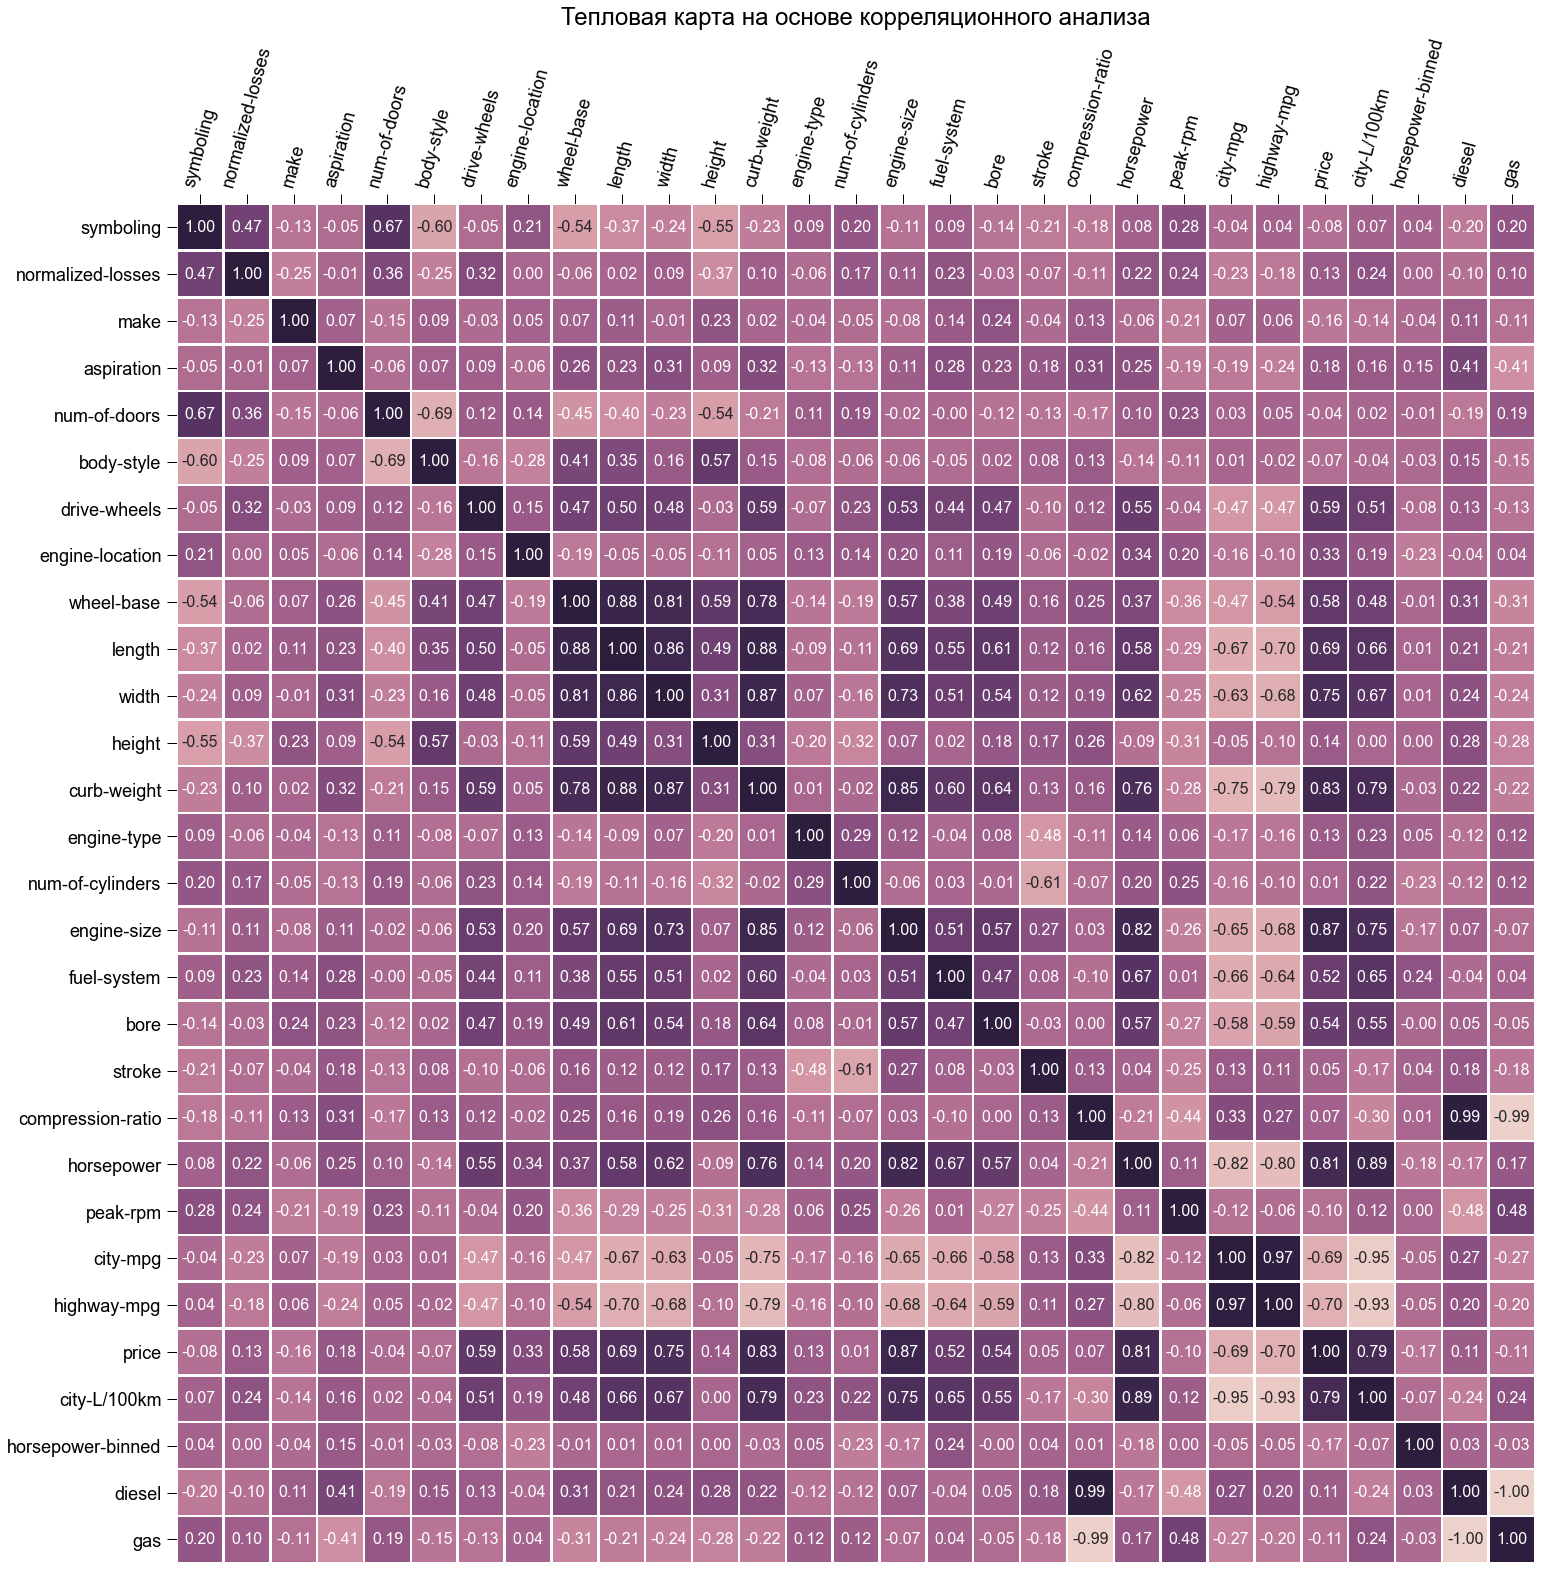

In [344]:
def _heatmap(corr, figsize, yrotation = False):
    """
    Построение тепловой карты на основе корреляционного анализа

    (pandas.core.frame.DataFrame, tuple, bool) -> None

    Аргументы:
       corr - Корреляционный анализ
       figsize - Размер фигуры в дюймах
       yrotation - Поворот меток по оси Y

    Возвращает: None
    """
    
    # Создание новой фигуры
    plt.figure(
        figsize = figsize # Размер фигуры в дюймах
    )

    ax = plt.axes() # Добавление осей к текущей фигуре
    ax.xaxis.tick_top() # Перемещение меток в верхнюю часть

    # Изменение внешнего вида меток
    ax.tick_params(
        axis = 'x', # Ось
        direction = 'out', # Расположение линий меток
        length = 10, # Длина линий меток
        width = 1, # Ширина линий меток 
        color = '#000000', # Цвет линий меток
        pad = 5, # Расстояние между линиями меток и метками
        labelsize = 18, # Размер метки
        labelcolor = '#000000', # Цвет метки
        top = True,  # Рисование линий меток
    )
    ax.tick_params(
        axis = 'y', # Ось
        direction = 'out', # Расположение линий меток
        length = 10, # Длина линий меток
        width = 1, # Ширина линий меток 
        color = '#000000', # Цвет линий меток
        pad = 5, # Расстояние между линиями меток и метками
        labelsize = 18, # Размер метки
        labelcolor = '#000000', # Цвет метки
        left = True  # Рисование линий меток
    )

    # Заголовок осей
    ax.set_title(
        label = 'Тепловая карта на основе корреляционного анализа', # Заголовок
        fontdict = {
            'fontsize': 24, # Размер заголовка
            'color': '#000000' # Цвет заголовка
        },
        pad = 10 # Отступ заголовка от вершины осей
    )

    # Цветовая палитра
    cmap = sns.cubehelix_palette(
        as_cmap = True, # Возврат таблицы цветов matplotlib
        reverse = False # От темного цвета к светлому
    )

    # Тепловая карта
    heatmap = sns.heatmap(
        corr, # 2D набор данных
        annot = True, # Запись данных в ячейки
        fmt = '.2f', # Форматирование строки
        square = True, # Квадратные ячейки
        linewidths = 1.5, # Ширина разделения ячеек
        annot_kws = {'size': 16}, # Размер значений в ячейках
        cbar_kws = {'orientation': 'vertical'}, # Ориентация цвет
        cmap = cmap, # Цветовая палитра
        ax = ax, # Оси для рисования
        cbar = False # Рисование цветной полосы
    )
    
    # Поворот меток по оси Y
    if yrotation == True:
        heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation = 0) # Поворот меток на N градусов
    
    heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation = 75) # Поворот меток на N градусов

    plt.show() # Отображение фигуры

figsize = (25, 25)

'''
Построение тепловой карты на основе корреляционного анализа
'''
_heatmap(Corr, figsize)

### Выбор наиболее коррелируемых данных относительно целевой переменной `price` (1 этап)

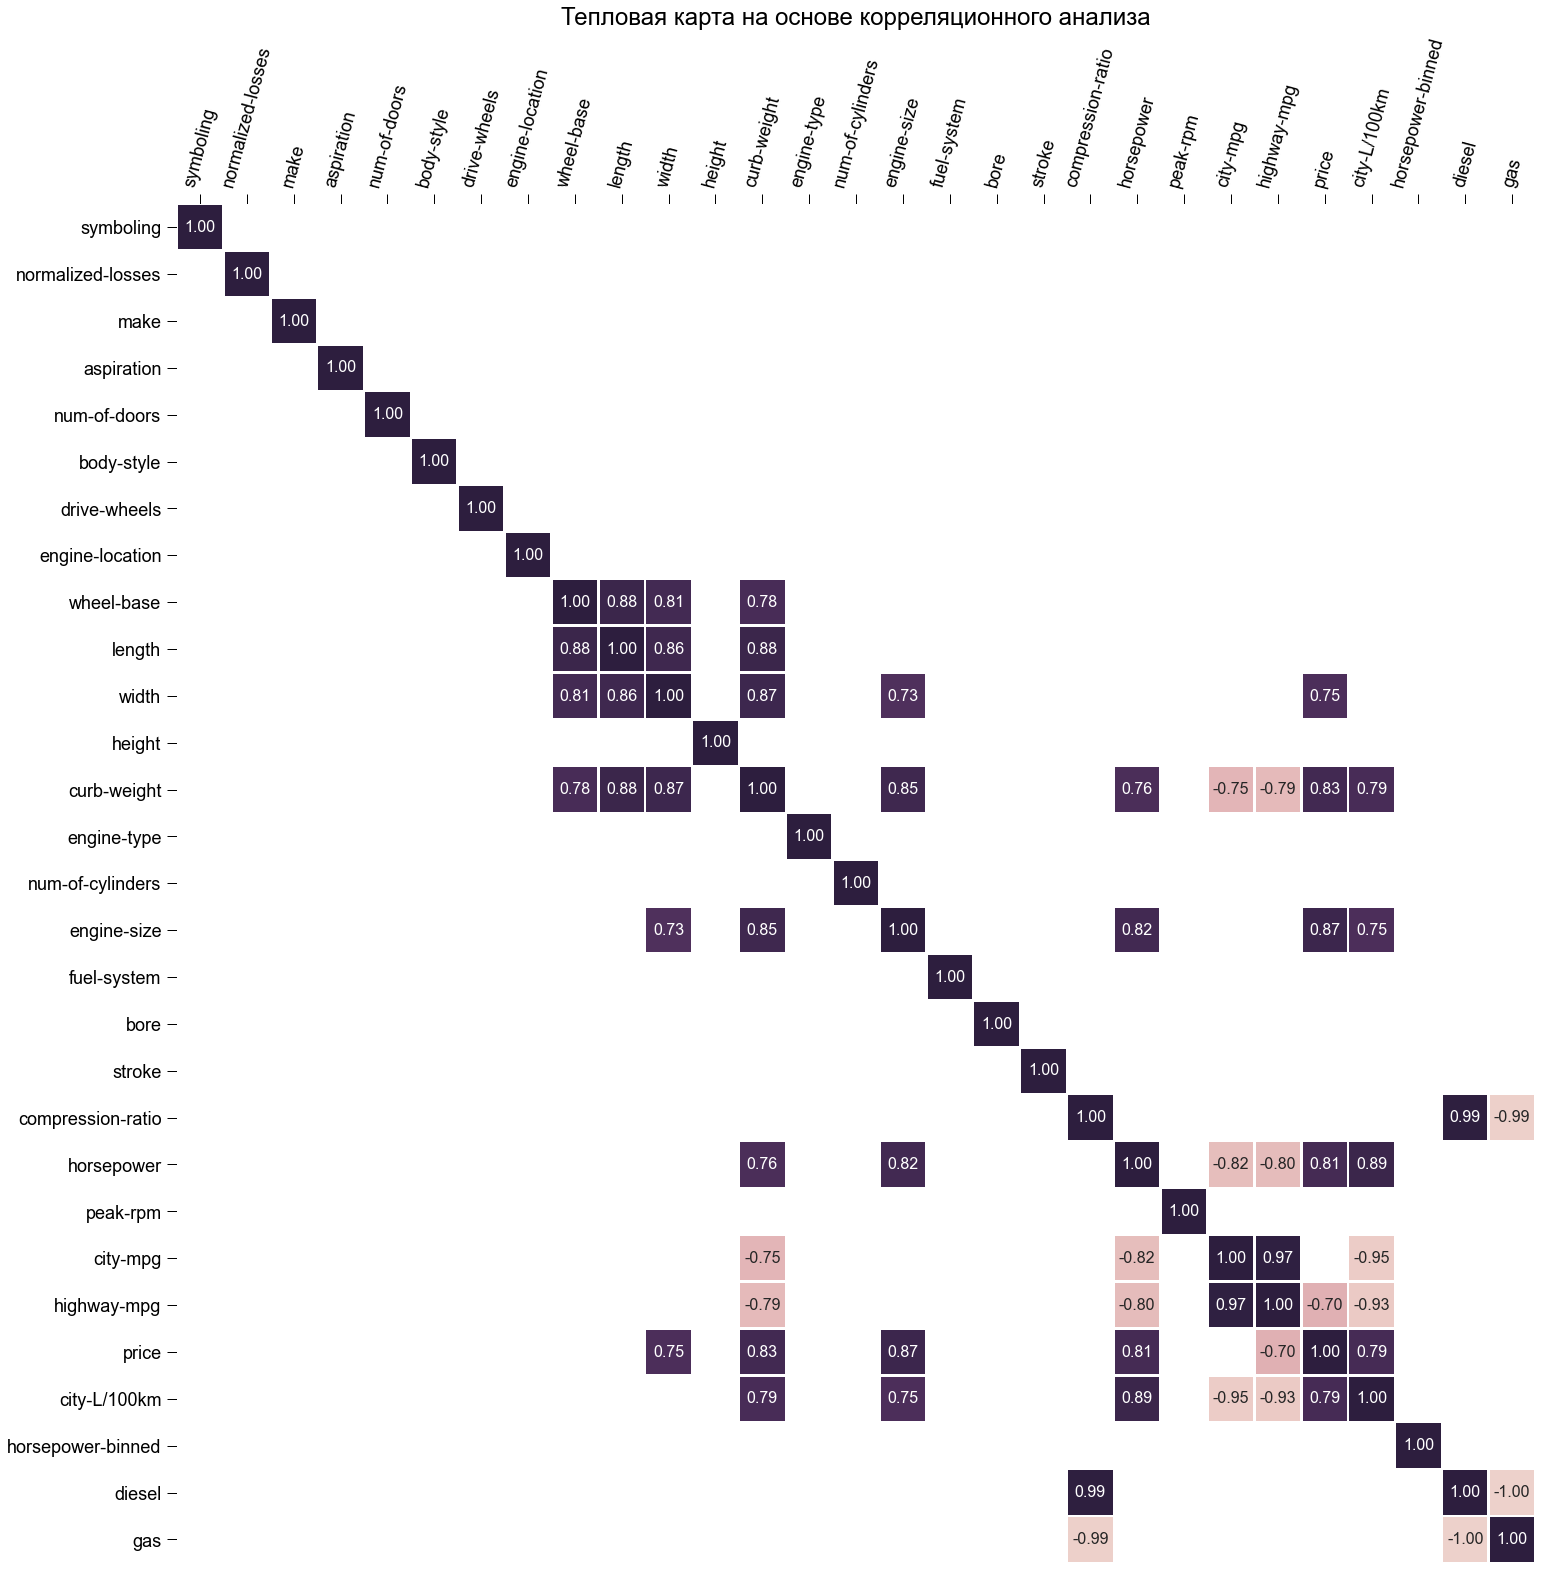

In [345]:
# Пороги корреляции
thresholds = {
    'pos': 0.70, # Позитивная
    'neg': -0.70 # Негативная
}

'''
Построение тепловой карты на основе корреляционного анализа
'''
_heatmap(Corr[(Corr >= thresholds['pos']) | (Corr <= thresholds['neg'])], figsize)

### Выбор наиболее коррелируемых данных относительно целевой переменной `price` (2 этап)

In [347]:
corr_fields = [] # Коррелируемые поля

target_var = 'price' # Целевая переменная

most_corr_data = {'Target_variable': [], 'Correlation_variable': [], 'Correlation': []} # Отображение в DataFrame

# Проход по всем строкам корреляционной матрицы
for i in Corr:
    # Проход по всем значениям строк, которые удовлетворяют правилу порогов корреляции
    for j in Corr.index[np.logical_or(Corr[i] >= thresholds['pos'], Corr[i] <= thresholds['neg'])]:
        # Выбор только тех признаков, которые коррелируемые с целевой переменной
        if target_var == i and i != j and j not in corr_fields and i not in corr_fields:
            corr_fields.append(j) # Добавление кореллируемого поля
            
            most_corr_data['Target_variable'].append(i) # Целевая переменная
            most_corr_data['Correlation_variable'].append(j) # Коррелирующая переменная
            most_corr_data['Correlation'].append(round(Corr[i][Corr.index == j].values[0], 2)) # Корреляция

corr_fields.append(target_var) # Добавление целевой переменной в коррелируемые поля

df_most_corr = pd.DataFrame(data = most_corr_data) # Наиболее коррелируемых данных относительно целевой переменной
df_most_corr.head(None) # Отображение первых N строк или все если указать None

,Target_variable,Correlation_variable,Correlation
0,price,width,0.75
1,price,curb-weight,0.83
2,price,engine-size,0.87
3,price,horsepower,0.81
4,price,highway-mpg,-0.70
5,price,city-L/100km,0.79


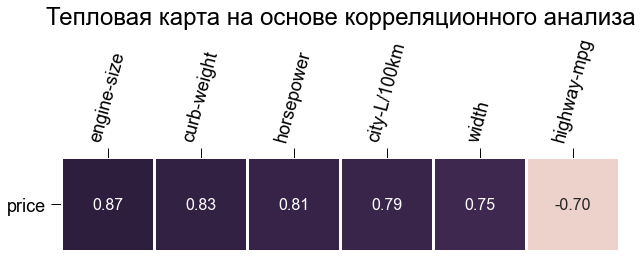

In [348]:
CorrBest = df_encoder[corr_fields].corr(method = 'pearson') # Корреляция Пирсона

CorrBest = CorrBest[[target_var]][:-1] # Выбор только тех полей которые коррелируют с целевой переменной

CorrBest = CorrBest.sort_values(by=[target_var], ascending = False) # Сортировка корреляционных данных

CorrBest = CorrBest.transpose() # Транспонирование

'''
Построение тепловой карты на основе корреляционного анализа
'''
_heatmap(CorrBest, (10, 10), True)

### Построение регрессионных моделей на основе корреляционного анализа

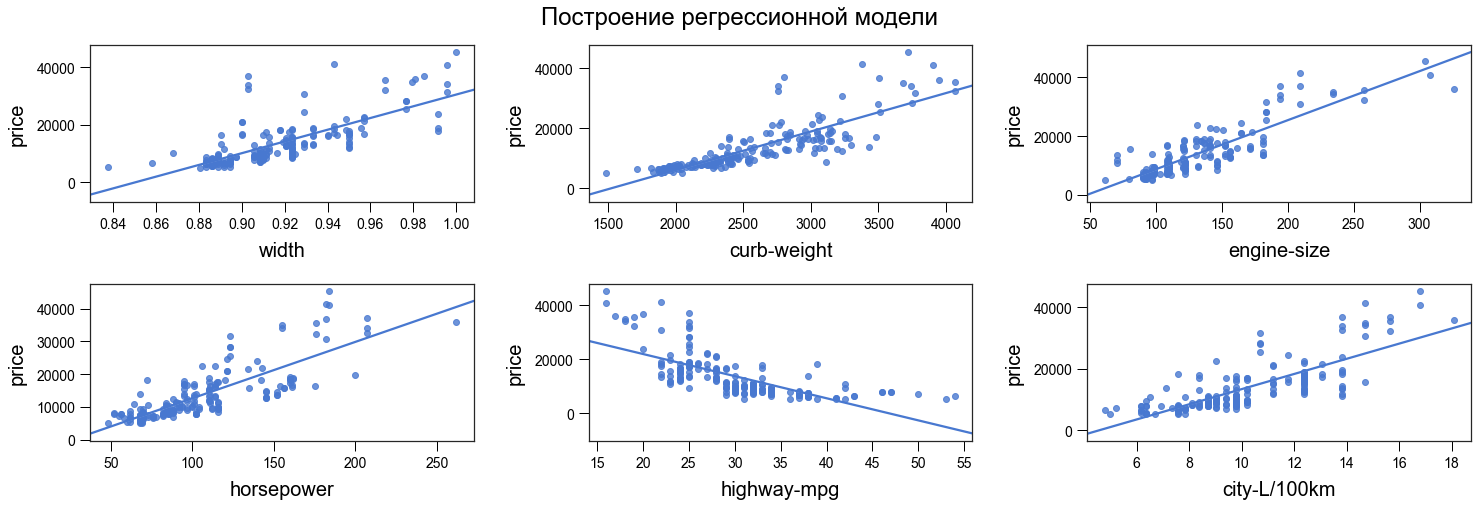

In [349]:
# Создание новой фигуры
fig = plt.figure(
    figsize = (21, 7) # Размер фигуры в дюймах
)

# Установка эстетических параметров
sns.set(
    style = 'white', # Стиль
    palette = 'muted', # Пальтра
    color_codes = True
)
sns.despine(left = True)

corr_fields_num = len(corr_fields) - 1

cols = 3 # Количество столбцов

# Количество коррелируемых данных с целевой переменной меньше и равно количеству столбцов
if cols >= corr_fields_num:
    cols = corr_fields_num # Количество столбцов
    rows = 1 # Количество строк
else:
    rows = math.ceil(corr_fields_num / cols) # Количество строк

n = 0 # Номер коррелируемого поля

# Проход по всем строкам
for i in range(0, rows):
    # Проход по всем столбцам
    for j in range(0, cols):
        # Создание оси в определенном месте внутри регулярной сетки
        ax = pylab.subplot2grid((rows, cols),(i, j))

        # Изменение внешнего вида меток
        ax.tick_params(
            axis = 'x', # Ось
            direction = 'out', # Расположение линий меток
            length = 10, # Длина линий меток
            width = 1, # Ширина линий меток 
            color = '#000000', # Цвет линий меток
            pad = 5, # Расстояние между линиями меток и метками
            labelsize = 14, # Размер метки
            labelcolor = '#000000', # Цвет метки
            bottom = True,  # Рисование линий меток
        )
        ax.tick_params(
            axis = 'y', # Ось
            direction = 'out', # Расположение линий меток
            length = 10, # Длина линий меток
            width = 1, # Ширина линий меток 
            color = '#000000', # Цвет линий меток
            pad = 5, # Расстояние между линиями меток и метками
            labelsize = 14, # Размер метки
            labelcolor = '#000000', # Цвет метки
            left = True  # Рисование линий меток
        )
        
        # Регрессионная модель
        sns.regplot(
            x = corr_fields[n], # Корреляционные данные
            y = target_var, # Целевая переменная
            data = df[corr_fields], # Набор данных
            ax = ax, # Оси для рисования
            fit_reg = True, # Построение регрессионной модели
            ci = False, # Отображение доверительного порога
            truncate = False # Усечение графика по значениям
        )
        
        # Изменение внешнего вида меток данных
        ax.set_xlabel(
            ax.get_xlabel(),
            fontsize = 20, # Размер метки
            fontdict = {
                'color': '#000000' # Цвет метки
            },
            labelpad = 10 # Отступ
            
        );
        ax.set_ylabel(
            ax.get_ylabel(),
            fontsize = 20, # Размер метки
            fontdict = {
                'color': '#000000' # Цвет метки
            },
            labelpad = 10 # Отступ
        );
        
        n += 1 # Увеличение  номера коррелируемого поля
        
        # Остановка на последнем коррелируемом поле
        if n == corr_fields_num:
            break

# # Заголовок фигуры
pylab.suptitle(
    t = 'Построение регрессионной модели', # Заголовок
    fontsize = 24, # Размер заголовка
    fontdict = {
        'color': '#000000' # Цвет заголовка
    },
    y = 1.025 # Отступ заголовка от вершины осей
)

fig.tight_layout(pad = 2.0) # Установка расстояния между осями

plt.show() # Отображение фигуры


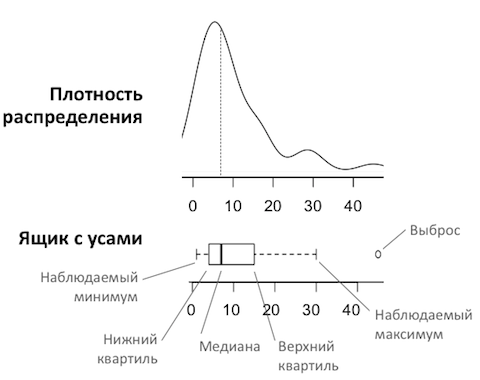

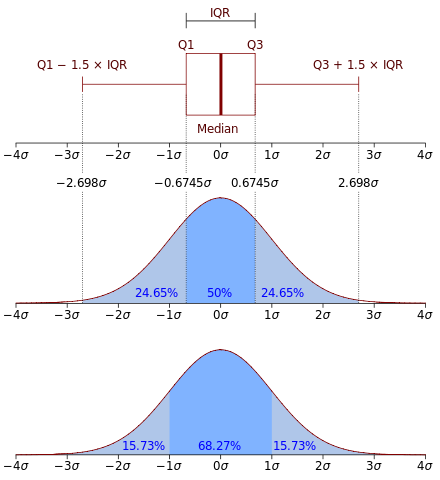

/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


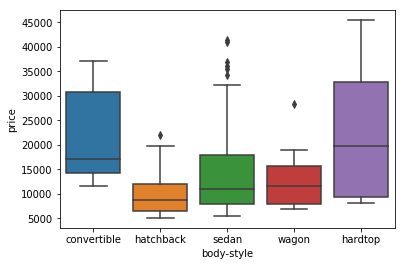

In [35]:
sns.boxplot(x="body-style", y="price", data=df)

/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


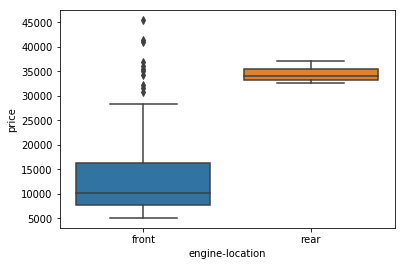

In [36]:
sns.boxplot(x="engine-location", y="price", data=df)

/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


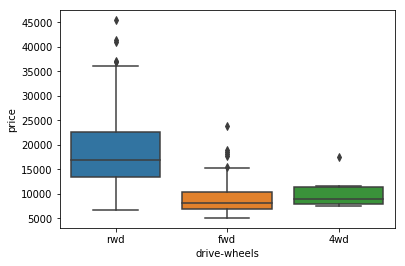

In [37]:
sns.boxplot(x="drive-wheels", y="price", data=df)

In [40]:
df['drive-wheels'].value_counts()

fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64

In [41]:
df['drive-wheels'].value_counts().to_frame()

,drive-wheels
fwd,118
rwd,75
4wd,8


In [42]:
drive_wheels_counts = df['drive-wheels'].value_counts().to_frame()
drive_wheels_counts.rename(columns={'drive-wheels': 'value_counts'}, inplace=True)
drive_wheels_counts

,value_counts
fwd,118
rwd,75
4wd,8


In [43]:
drive_wheels_counts.index.name = 'drive-wheels'
drive_wheels_counts

,value_counts
drive-wheels,
fwd,118
rwd,75
4wd,8


In [44]:
engine_loc_counts = df['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine-location': 'value_counts'}, inplace=True)
engine_loc_counts.index.name = 'engine-location'
engine_loc_counts.head(10)

,value_counts
engine-location,
front,198
rear,3


In [45]:
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [46]:
df_group_one = df[['drive-wheels','body-style','price']]

In [47]:
df_group_one = df_group_one.groupby(['drive-wheels'],as_index=False).mean()
df_group_one

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


In [48]:
df_gptest = df[['drive-wheels','body-style','price']]
grouped_test1 = df_gptest.groupby(['drive-wheels','body-style'],as_index=False).mean()
grouped_test1

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [49]:
grouped_pivot = grouped_test1.pivot(index='drive-wheels',columns='body-style')
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [50]:
grouped_pivot = grouped_pivot.fillna(0) 
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [51]:
df_gptest2 = df[['body-style','price']]
grouped_test_bodystyle = df_gptest2.groupby(['body-style'], as_index= False).mean()
grouped_test_bodystyle

,body-style,price
0,convertible,21890.500000
1,hardtop,22208.500000
2,hatchback,9957.441176
3,sedan,14459.755319
4,wagon,12371.960000


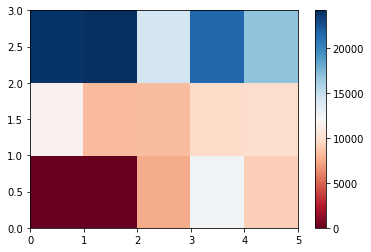

In [52]:
plt.pcolor(grouped_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

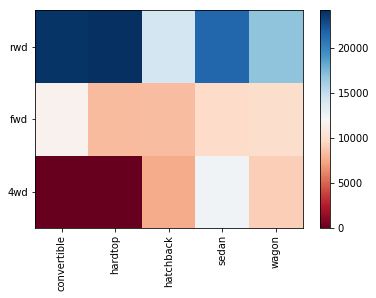

In [53]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

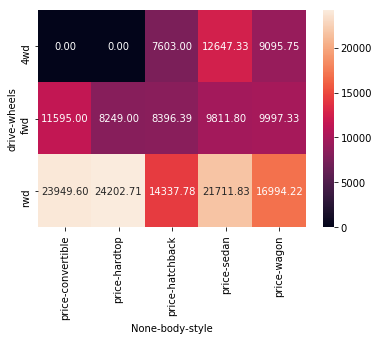

In [54]:
sns.heatmap(grouped_pivot, annot=True, fmt='.2f')

In [56]:
from scipy import stats

In [106]:
cols = ['wheel-base', 'horsepower', 'length', 'width', 'curb-weight',
       'engine-size', 'bore', 'city-mpg', 'highway-mpg']

for col in cols: 
    pearson_coef, p_value = stats.pearsonr(df[col], df['price'])
    print("PearsonR между {} и price {} с P-знчением P = {}".format(
          col, pearson_coef, p_value ))
    
    if p_value < 0.001:
        print('Корреляция между {} и price статистически значимая'.format(col))
    elif p_value < 0.05:
        print('Корреляция между {} и price средняя'.format(col))
    elif p_value < 0.1:
        print('Корреляция между {} и price слабая'.format(col))
    else:
        print('Корреляция между {} и price статистически незначимая'.format(col))
        
    if pearson_coef > 0 :
        if pearson_coef > 0.85:
            print('Коэффициент ~{} показывает положительную очень сильную связь\n'.format(pearson_coef))
        elif pearson_coef > 0.75 :
            print('Коэффициент ~{} показывает положительную достаточно сильную связь\n'.format(pearson_coef))
        elif pearson_coef > 0.60:
            print('Коэффициент ~{} показывает положительную относительно сильную связь\n'.format(pearson_coef))
        elif pearson_coef > 0.50 :
            print('Коэффициент ~{} показывает положительную среднюю связь\n'.format(pearson_coef))
        else:
            print('Коэффициент ~{} показывает положительную слабую связь\n'.format(pearson_coef))
    else:
        if abs(pearson_coef) > 0.85:
            print('Коэффициент ~{} показывает негативную очень сильную связь\n'.format(pearson_coef))
        elif abs(pearson_coef) > 0.75 :
            print('Коэффициент ~{} показывает негативную достаточно сильную связь\n'.format(pearson_coef))
        elif abs(pearson_coef) > 0.60:
            print('Коэффициент ~{} показывает негативную относительно сильную связь\n'.format(pearson_coef))
        elif abs(pearson_coef) > 0.50 :
            print('Коэффициент ~{} показывает положительную среднюю связь\n'.format(pearson_coef))
        else:
            print('Коэффициент ~{} показывает положительную слабую связь\n'.format(pearson_coef))

PearsonR между wheel-base и price 0.5846418222655081 с P-знчением P = 8.076488270732955e-20
Корреляция между wheel-base и price статистически значимая
Коэффициент ~0.5846418222655081 показывает положительную среднюю связь

PearsonR между horsepower и price 0.8095745670036559 с P-знчением P = 6.36905742825998e-48
Корреляция между horsepower и price статистически значимая
Коэффициент ~0.8095745670036559 показывает положительную достаточно сильную связь

PearsonR между length и price 0.690628380448364 с P-знчением P = 8.016477466159053e-30
Корреляция между length и price статистически значимая
Коэффициент ~0.690628380448364 показывает положительную относительно сильную связь

PearsonR между width и price 0.7512653440522674 с P-знчением P = 9.200335510481426e-38
Корреляция между width и price статистически значимая
Коэффициент ~0.7512653440522674 показывает положительную достаточно сильную связь

PearsonR между curb-weight и price 0.8344145257702846 с P-знчением P = 2.1895772388936997e-53


In [58]:
grouped_test2=df_gptest[['drive-wheels', 'price']].groupby(['drive-wheels'])
grouped_test2.head(2)

,drive-wheels,price
0,rwd,13495.0
1,rwd,16500.0
3,fwd,13950.0
4,4wd,17450.0
5,fwd,15250.0
136,4wd,7603.0


In [59]:
df_gptest

,drive-wheels,body-style,price
0,rwd,convertible,13495.0
1,rwd,convertible,16500.0
2,rwd,hatchback,16500.0
3,fwd,sedan,13950.0
4,4wd,sedan,17450.0
5,fwd,sedan,15250.0
6,fwd,sedan,17710.0
7,fwd,wagon,18920.0
8,fwd,sedan,23875.0
9,rwd,sedan,16430.0


In [60]:
grouped_test2.get_group('4wd')['price']

4      17450.0
136     7603.0
140     9233.0
141    11259.0
144     8013.0
145    11694.0
150     7898.0
151     8778.0
Name: price, dtype: float64

In [61]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], 
                              grouped_test2.get_group('rwd')['price'], 
                              grouped_test2.get_group('4wd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 67.9540650078 , P = 3.39454435772e-23


In [62]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val )

ANOVA results: F= 130.553316096 , P = 2.23553063557e-23


In [63]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('rwd')['price'])  
   
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 8.58068136892 , P = 0.00441149221123


In [64]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('fwd')['price'])  
 
print("ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 0.665465750252 , P = 0.416201166978


<ul>
    <li>Length</li>
    <li>Width</li>
    <li>Curb-weight</li>
    <li>Engine-size</li>
    <li>Horsepower</li>
    <li>City-mpg</li>
    <li>Highway-mpg</li>
    <li>Wheel-base</li>
    <li>Bore</li>
</ul>

In [113]:
[(0.4289887151699317, 'curb-weight'),
 (0.38312780616934872, 'engine-size'),
 (0.058949747747546584, 'horsepower'),
 (0.058447510065482169, 'highway-mpg'),
 (0.03854486191196442, 'city-L/100km'),
 (0.013724554362176651, 'city-mpg')]

[(0.4289887151699317, 'curb-weight'),
 (0.3831278061693487, 'engine-size'),
 (0.058949747747546584, 'horsepower'),
 (0.05844751006548217, 'highway-mpg'),
 (0.03854486191196442, 'city-L/100km'),
 (0.013724554362176651, 'city-mpg')]

In [89]:
df=df.fillna(0)

In [90]:
y=df.price

In [91]:
X=df.drop('price',axis=1)

In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [93]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform (X_test)

/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [94]:
from sklearn.ensemble import RandomForestRegressor

In [95]:
regr = RandomForestRegressor(max_depth=2, random_state=0, n_estimators=100)
regr.fit(X_train, y_train)  

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [96]:
print(regr.feature_importances_)

[  0.00000000e+00   0.00000000e+00   4.19445982e-04   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   1.59187667e-03   3.29384960e-03   4.92277560e-03   0.00000000e+00
   4.28988715e-01   1.22252081e-03   2.32488689e-03   3.83127806e-01
   0.00000000e+00   2.08281324e-03   4.45625958e-04   1.53848273e-03
   5.89497477e-02   3.74527089e-04   1.37245544e-02   5.84475101e-02
   3.85448619e-02   0.00000000e+00   0.00000000e+00   0.00000000e+00]


In [99]:
df=df.drop('price',axis=1)

In [100]:
importances = list(zip(regr.feature_importances_, df.columns))
importances.sort(reverse=True)

In [101]:
importances

[(0.4289887151699317, 'curb-weight'),
 (0.38312780616934872, 'engine-size'),
 (0.058949747747546584, 'horsepower'),
 (0.058447510065482169, 'highway-mpg'),
 (0.03854486191196442, 'city-L/100km'),
 (0.013724554362176651, 'city-mpg'),
 (0.0049227756000594369, 'width'),
 (0.0032938496040047548, 'length'),
 (0.0023248868919002203, 'num-of-cylinders'),
 (0.0020828132435733713, 'bore'),
 (0.0015918766682669757, 'wheel-base'),
 (0.0015384827289067538, 'compression-ratio'),
 (0.001222520808421595, 'engine-type'),
 (0.00044562595775643449, 'stroke'),
 (0.00041944598215072187, 'make'),
 (0.0003745270885094201, 'peak-rpm'),
 (0.0, 'symboling'),
 (0.0, 'num-of-doors'),
 (0.0, 'normalized-losses'),
 (0.0, 'horsepower-binned'),
 (0.0, 'height'),
 (0.0, 'gas'),
 (0.0, 'fuel-system'),
 (0.0, 'engine-location'),
 (0.0, 'drive-wheels'),
 (0.0, 'diesel'),
 (0.0, 'body-style'),
 (0.0, 'aspiration')]